In [1]:
import pandas as pd
import numpy as np

In [2]:
File_to_work_with = '../Data/Proposed_structures_with_AI_caffeine_tanimoto_similarity_.xlsx'

In [3]:
initial = pd.read_excel(File_to_work_with)

In [4]:
initial.head()

,Unnamed: 0,new_SMILES,CID,PUBCHEM_SMILES,CN1C(N(C)CCCCCCCCN(C=C(/C=C(C(OC)=O)\S)[N+]([O-])=O)C)=NC2=C1C(N(C)C(N2C)=O)=O,CN(C(N1C)=O)C2=C(N(C)C(NCCCCN)=N2)C1=O,O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CCCCCCCCN=[N+]=[N-])N=N5)N2C)N(C)C(N1C)=O,O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CC6=C(CN=[N+]=[N-])C=CC=C6)N=N5)N2C)N(C)C(N1C)=O,O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CC6=CC=C(CN=[N+]=[N-])C=C6)N=N5)N2C)N(C)C(N1C)=O,O=C1C2=C(N=C(NCCCCN3C(C=CC3=O)=O)N2C)N(C)C(N1C)=O,...,CN1C(NCCCC/N=C2SCC(N/2)=O)=NC3=C1C(N(C)C(N3C)=O)=O,CN1C(NCCC/N=C2SCC(N/2)=O)=NC3=C1C(N(C)C(N3C)=O)=O,CN1C(SC2=NC3=C(N2)C=CC=C3)=NC2=C1C(=O)N(C)C(=O)N2C,CN(C(N1C)=S)C2=C(N(C)C=N2)C1=S,CN(C(N1C)=O)C2=C(N(C)C(NCCNC(C)=O)=N2)C1=O,CN1C(N(C)CCN(C=C(/C=C(C(OC)=O)\S)[N+]([O-])=O)C)=NC2=C1C(N(C)C(N2C)=O)=O,CN(C(N1C)=O)C2=C(N(C)C(NCCN)=N2)C1=O,CN(C(C(N(C)C(NCCCNCCCNCCCN)=N1)=C1N2C)=O)C2=O,CN(C(N1C)=O)C2=C(N(C)C=N2)C1=O,O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CCCCCN=[N+]=[N-])N=N5)N2C)N(C)C(N1C)=O
0,0,CN1N=C1Sc1ccccc1,0,0,0.103526,0.100000,0.097956,0.099865,0.099448,0.106419,...,0.109908,0.109349,0.107612,0.091011,0.101619,0.101504,0.101289,0.099910,0.101136,0.098164
1,1,CN1CCCCCCNCNc2c(n(C)c(=O)n(C)c2=O)N1,0,0,0.447923,0.414961,0.423472,0.434911,0.425926,0.428087,...,0.432997,0.430303,0.391627,0.298529,0.412587,0.436745,0.409059,0.416433,0.361111,0.423380
2,2,CNCCC1CCCN(C)Nc2c(c(=O)n(C)c(=O)n2C)N1,0,0,0.461974,0.427091,0.437165,0.454918,0.445363,0.441411,...,0.449967,0.445400,0.398154,0.305218,0.421736,0.450907,0.418396,0.429456,0.362211,0.437090
3,3,CN1CCC(CCNC=N)=Nc2c1n(C)c(=O)n(C)c2=O,0,0,0.479271,0.436214,0.458781,0.464182,0.455614,0.455873,...,0.458553,0.454008,0.409836,0.316537,0.429831,0.460821,0.424658,0.436562,0.366519,0.457860
4,4,CNCCCCCCN1CC2=C(N1)N(C)C(=O)N(C)C2,0,0,0.307278,0.265260,0.291906,0.294880,0.293785,0.291939,...,0.276204,0.275177,0.263656,0.228669,0.266069,0.297987,0.255656,0.272385,0.231164,0.290816


In [5]:
initial = initial.columns.values.tolist()

In [6]:
initial

['Unnamed: 0',
 'new_SMILES',
 'CID',
 'PUBCHEM_SMILES',
 'CN1C(N(C)CCCCCCCCN(C=C(/C=C(C(OC)=O)\\S)[N+]([O-])=O)C)=NC2=C1C(N(C)C(N2C)=O)=O',
 'CN(C(N1C)=O)C2=C(N(C)C(NCCCCN)=N2)C1=O',
 'O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CCCCCCCCN=[N+]=[N-])N=N5)N2C)N(C)C(N1C)=O',
 'O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CC6=C(CN=[N+]=[N-])C=CC=C6)N=N5)N2C)N(C)C(N1C)=O',
 'O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CC6=CC=C(CN=[N+]=[N-])C=C6)N=N5)N2C)N(C)C(N1C)=O',
 'O=C1C2=C(N=C(NCCCCN3C(C=CC3=O)=O)N2C)N(C)C(N1C)=O',
 'CN(C(C(N(C)C(NCCCNCCCCNCCCN)=N1)=C1N2C)=O)C2=O',
 'CN(C(N1C)=O)C2=C(N(C)C(SC3=CC=CC=C3)=N2)C1=O',
 'O=C1C2=C(N=C(NCCCCN3C(CCC3=O)=O)N2C)N(C)C(N1C)=O',
 'CNCCCCCCCCN(C)C1=NC2=C(N(C(N(C2=O)C)=O)C)N1C',
 'CNCCCCCCN(C)C1=NC2=C(N(C(N(C2=O)C)=O)C)N1C',
 'O=C1C2=C(N=C(NCCCN3C(C(C=CC=C4)=C4C3=O)=O)N2C)N(C)C(N1C)=O',
 'CN(C(N1C)=O)C2=C(N(C)C(NCCCCNC(C)=O)=N2)C1=O',
 'CN(C(C(N(C)C(NCCNCCCNCCN)=N1)=C1N2C)=O)C2=O',
 'CN(C)CCN(C1=NC2=C(N1C)N(C)C(N(C)C2=O)=O)C',
 'O=C1C2=C(N=C(NCCCN3C(CCC3=O)=O)N2

In [7]:
initial = initial[4:]

In [8]:
initial

['CN1C(N(C)CCCCCCCCN(C=C(/C=C(C(OC)=O)\\S)[N+]([O-])=O)C)=NC2=C1C(N(C)C(N2C)=O)=O',
 'CN(C(N1C)=O)C2=C(N(C)C(NCCCCN)=N2)C1=O',
 'O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CCCCCCCCN=[N+]=[N-])N=N5)N2C)N(C)C(N1C)=O',
 'O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CC6=C(CN=[N+]=[N-])C=CC=C6)N=N5)N2C)N(C)C(N1C)=O',
 'O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CC6=CC=C(CN=[N+]=[N-])C=C6)N=N5)N2C)N(C)C(N1C)=O',
 'O=C1C2=C(N=C(NCCCCN3C(C=CC3=O)=O)N2C)N(C)C(N1C)=O',
 'CN(C(C(N(C)C(NCCCNCCCCNCCCN)=N1)=C1N2C)=O)C2=O',
 'CN(C(N1C)=O)C2=C(N(C)C(SC3=CC=CC=C3)=N2)C1=O',
 'O=C1C2=C(N=C(NCCCCN3C(CCC3=O)=O)N2C)N(C)C(N1C)=O',
 'CNCCCCCCCCN(C)C1=NC2=C(N(C(N(C2=O)C)=O)C)N1C',
 'CNCCCCCCN(C)C1=NC2=C(N(C(N(C2=O)C)=O)C)N1C',
 'O=C1C2=C(N=C(NCCCN3C(C(C=CC=C4)=C4C3=O)=O)N2C)N(C)C(N1C)=O',
 'CN(C(N1C)=O)C2=C(N(C)C(NCCCCNC(C)=O)=N2)C1=O',
 'CN(C(C(N(C)C(NCCNCCCNCCN)=N1)=C1N2C)=O)C2=O',
 'CN(C)CCN(C1=NC2=C(N1C)N(C)C(N(C)C2=O)=O)C',
 'O=C1C2=C(N=C(NCCCN3C(CCC3=O)=O)N2C)N(C)C(N1C)=O',
 'CN(C(N1C)=O)C2=C(N(C)C(NCC3=CNC=N3)=N2

In [9]:
generated_smiles = pd.read_excel(File_to_work_with)

In [10]:
generated_smiles = generated_smiles['new_SMILES']

In [11]:
generated_smiles

0                            CN1N=C1Sc1ccccc1
1        CN1CCCCCCNCNc2c(n(C)c(=O)n(C)c2=O)N1
2      CNCCC1CCCN(C)Nc2c(c(=O)n(C)c(=O)n2C)N1
3       CN1CCC(CCNC=N)=Nc2c1n(C)c(=O)n(C)c2=O
4          CNCCCCCCN1CC2=C(N1)N(C)C(=O)N(C)C2
                        ...                  
378         CN(C=O)C(=O)N(C)C(=O)CCN1C#CC=CC1
379       CN1CC(=O)C(NN2C#CC=CC2)N(C)C(=O)C1O
380        CN(C=O)C(C=O)N(C)C(=O)CCN1C#CC=CC1
381           CN(C=O)C(=O)N(CC=O)CNN1C#CC=CC1
382          CNCCCN(CN)CN(C)C(=O)CCN1C#CC=CC1
Name: new_SMILES, Length: 383, dtype: object

## Molecular descriptors to be used

In [12]:
from rdkit import Chem
from mordred import Calculator, descriptors, Lipinski
import mordred

In [13]:
descriptor1_initials = []
descriptor1_generated = []

descriptor2_initials = []
descriptor2_generated = []

descriptor3_initials = []
descriptor3_generated = []


In [14]:
mol_objs_ini = [Chem.MolFromSmiles(smi) for smi in initial]
mol_objs_gen = [Chem.MolFromSmiles(smi) for smi in generated_smiles]

In [15]:
calc = Calculator(descriptors, ignore_3D=True)
molecular_descriptors_initials = calc.pandas(mol_objs_ini)
molecular_descriptors_generated = calc.pandas(mol_objs_gen)

100%|████████████████████████████████████████████████████████████████████████████████| 383/383 [00:04<00:00, 79.62it/s]


In [16]:
molecular_descriptors_initials.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,28.335611,22.700065,0,0,46.710781,2.545706,4.974599,46.710781,1.229231,4.525761,...,10.435556,88.765838,551.252603,7.350035,6324,61,186.0,216.0,16.555556,8.638889
1,15.072670,13.353770,0,1,25.206271,2.535622,4.964134,25.206271,1.260314,3.912530,...,10.009783,68.084990,280.164774,7.004119,827,34,102.0,123.0,8.388889,4.555556
2,31.921913,23.549860,0,0,53.441916,2.551311,4.980028,53.441916,1.303461,4.643925,...,10.644972,95.611998,576.249189,7.893825,6835,66,216.0,258.0,12.805556,9.138889
3,32.588580,24.645490,0,0,54.116554,2.551378,4.980094,54.116554,1.319916,4.662598,...,10.763695,95.991567,568.186589,8.741332,6121,71,226.0,275.0,12.527778,8.916667
4,32.629020,23.925112,0,0,54.104226,2.551359,4.980075,54.104226,1.319615,4.662499,...,10.748776,95.963887,568.186589,8.741332,6369,70,226.0,274.0,12.527778,8.888889


In [17]:
molecular_descriptors_generated.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,8.554231,8.087215,0,2,14.380366,2.377203,4.536959,14.380366,1.307306,3.392622,...,9.154299,60.592294,164.040819,8.633727,166,10,56.0,64.0,3.083333,2.444444
1,16.567764,13.016759,0,1,27.794695,2.453752,4.907087,27.794695,1.263395,3.993207,...,9.889744,55.730558,310.211724,6.462744,984,37,108.0,125.0,8.277778,5.000000
2,16.567764,14.065493,0,1,27.678576,2.465833,4.923272,27.678576,1.258117,3.997315,...,9.963029,58.881465,310.211724,6.462744,969,39,110.0,129.0,8.888889,5.000000
3,15.820217,13.725063,0,2,26.317530,2.490744,4.952912,26.317530,1.253216,3.954815,...,9.986679,62.868319,292.164774,7.125970,893,39,106.0,126.0,8.638889,4.777778
4,15.015651,12.418646,0,1,25.378259,2.465851,4.830995,25.378259,1.268913,3.903059,...,9.759213,67.158639,281.221560,5.983437,961,28,98.0,113.0,7.166667,4.611111


In [18]:
def is_morder_missing(x):
    return np.nan if type(x) == mordred.error.Missing or type(x) == mordred.error.Error else x 

In [19]:
molecular_descriptors_initials = molecular_descriptors_initials.applymap(is_morder_missing)
molecular_descriptors_generated = molecular_descriptors_generated.applymap(is_morder_missing)

In [20]:
simple_preprocessing = True
if simple_preprocessing:
    molecular_descriptors_initials = molecular_descriptors_initials.dropna(axis=1, how='any')
    molecular_descriptors_generated = molecular_descriptors_generated.dropna(axis=1, how='any')

In [21]:
print(molecular_descriptors_initials.isna().sum().sum())
print(molecular_descriptors_generated.isna().sum().sum())
print(molecular_descriptors_initials.shape)
print(molecular_descriptors_generated.shape)

0
0
(58, 1388)
(383, 1277)


In [22]:
molecular_descriptors_initials = molecular_descriptors_initials.loc[:, (molecular_descriptors_initials != 0).any(axis=0)]
molecular_descriptors_generated = molecular_descriptors_generated.loc[:, (molecular_descriptors_generated != 0).any(axis=0)]

In [23]:
print(molecular_descriptors_initials.shape)
print(molecular_descriptors_generated.shape)

(58, 1137)
(383, 1128)


### Chosen descriptors:

-> "MW"

-> "Diameter"?

-> "SlogP"

-> "TopoPSA"

-> "WPol" -> the Wiener Polarity Number

-> "nRing" -> ring count

-> "AATS0Z" -> averaged moreau-broto autocorrelation of lag 0 weighted by atomic number

In [24]:
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D

In [25]:
preserve_only_common_columns = []
for element in list(molecular_descriptors_initials.columns):
    if element in list(molecular_descriptors_generated.columns):
        preserve_only_common_columns.append(element)
    else:
        print("Not found in generated structures : ", element)

Not found in generated structures :  AATS6dv
Not found in generated structures :  AATS7dv
Not found in generated structures :  AATS6d
Not found in generated structures :  AATS7d
Not found in generated structures :  AATS6s
Not found in generated structures :  AATS7s
Not found in generated structures :  AATS6Z
Not found in generated structures :  AATS7Z
Not found in generated structures :  AATS6m
Not found in generated structures :  AATS7m
Not found in generated structures :  AATS6v
Not found in generated structures :  AATS7v
Not found in generated structures :  AATS6se
Not found in generated structures :  AATS7se
Not found in generated structures :  AATS6pe
Not found in generated structures :  AATS7pe
Not found in generated structures :  AATS6are
Not found in generated structures :  AATS7are
Not found in generated structures :  AATS6p
Not found in generated structures :  AATS7p
Not found in generated structures :  AATS6i
Not found in generated structures :  AATS7i
Not found in generated

In [26]:
len(preserve_only_common_columns)

1026

In [27]:
print(preserve_only_common_columns)

['ABC', 'ABCGG', 'nBase', 'SpAbs_A', 'SpMax_A', 'SpDiam_A', 'SpAD_A', 'SpMAD_A', 'LogEE_A', 'VE1_A', 'VE2_A', 'VE3_A', 'VR1_A', 'VR2_A', 'VR3_A', 'nAromAtom', 'nAromBond', 'nAtom', 'nHeavyAtom', 'nHetero', 'nH', 'nC', 'nN', 'nO', 'nS', 'ATS0dv', 'ATS1dv', 'ATS2dv', 'ATS3dv', 'ATS4dv', 'ATS5dv', 'ATS6dv', 'ATS7dv', 'ATS8dv', 'ATS0d', 'ATS1d', 'ATS2d', 'ATS3d', 'ATS4d', 'ATS5d', 'ATS6d', 'ATS7d', 'ATS8d', 'ATS0s', 'ATS1s', 'ATS2s', 'ATS3s', 'ATS4s', 'ATS5s', 'ATS6s', 'ATS7s', 'ATS8s', 'ATS0Z', 'ATS1Z', 'ATS2Z', 'ATS3Z', 'ATS4Z', 'ATS5Z', 'ATS6Z', 'ATS7Z', 'ATS8Z', 'ATS0m', 'ATS1m', 'ATS2m', 'ATS3m', 'ATS4m', 'ATS5m', 'ATS6m', 'ATS7m', 'ATS8m', 'ATS0v', 'ATS1v', 'ATS2v', 'ATS3v', 'ATS4v', 'ATS5v', 'ATS6v', 'ATS7v', 'ATS8v', 'ATS0se', 'ATS1se', 'ATS2se', 'ATS3se', 'ATS4se', 'ATS5se', 'ATS6se', 'ATS7se', 'ATS8se', 'ATS0pe', 'ATS1pe', 'ATS2pe', 'ATS3pe', 'ATS4pe', 'ATS5pe', 'ATS6pe', 'ATS7pe', 'ATS8pe', 'ATS0are', 'ATS1are', 'ATS2are', 'ATS3are', 'ATS4are', 'ATS5are', 'ATS6are', 'ATS7are', '

In [28]:
x1 = 'MW' #GATS3c
x2 = 'TopoPSA' #WPol
x3 = 'nRing' #AATS0Z

In [29]:
descriptor1 = 'GATS3c'#str(input('Please input your first descriptor : '))
descriptor2 = 'WPol'#str(input('Please input your second descriptor : '))
descriptor3 = 'AATS0Z'#str(input('Please input your third descriptor : '))

In [30]:
whole_set_descriptor1 = molecular_descriptors_initials[descriptor1].append(molecular_descriptors_generated[descriptor1])
whole_set_descriptor2 = molecular_descriptors_initials[descriptor2].append(molecular_descriptors_generated[descriptor2])
whole_set_descriptor3 = molecular_descriptors_initials[descriptor3].append(molecular_descriptors_generated[descriptor3])

C:\Users\aleks\AppData\Local\Temp\ipykernel_23840\1232241802.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  whole_set_descriptor1 = molecular_descriptors_initials[descriptor1].append(molecular_descriptors_generated[descriptor1])
C:\Users\aleks\AppData\Local\Temp\ipykernel_23840\1232241802.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  whole_set_descriptor2 = molecular_descriptors_initials[descriptor2].append(molecular_descriptors_generated[descriptor2])
C:\Users\aleks\AppData\Local\Temp\ipykernel_23840\1232241802.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  whole_set_descriptor3 = molecular_descriptors_initials[descriptor3].append(molecular_descriptors_generated[descriptor3])


In [31]:
print(len(whole_set_descriptor1))
print(len(whole_set_descriptor2))
len(whole_set_descriptor3)

441
441


441

In [32]:
print(whole_set_descriptor1.min(), whole_set_descriptor1.max())
print(whole_set_descriptor2.min(), whole_set_descriptor2.max())
print(whole_set_descriptor3.min(), whole_set_descriptor3.max())

0.6058262363453811 1.6472942336684633
5 71
15.806451612903226 41.916666666666664


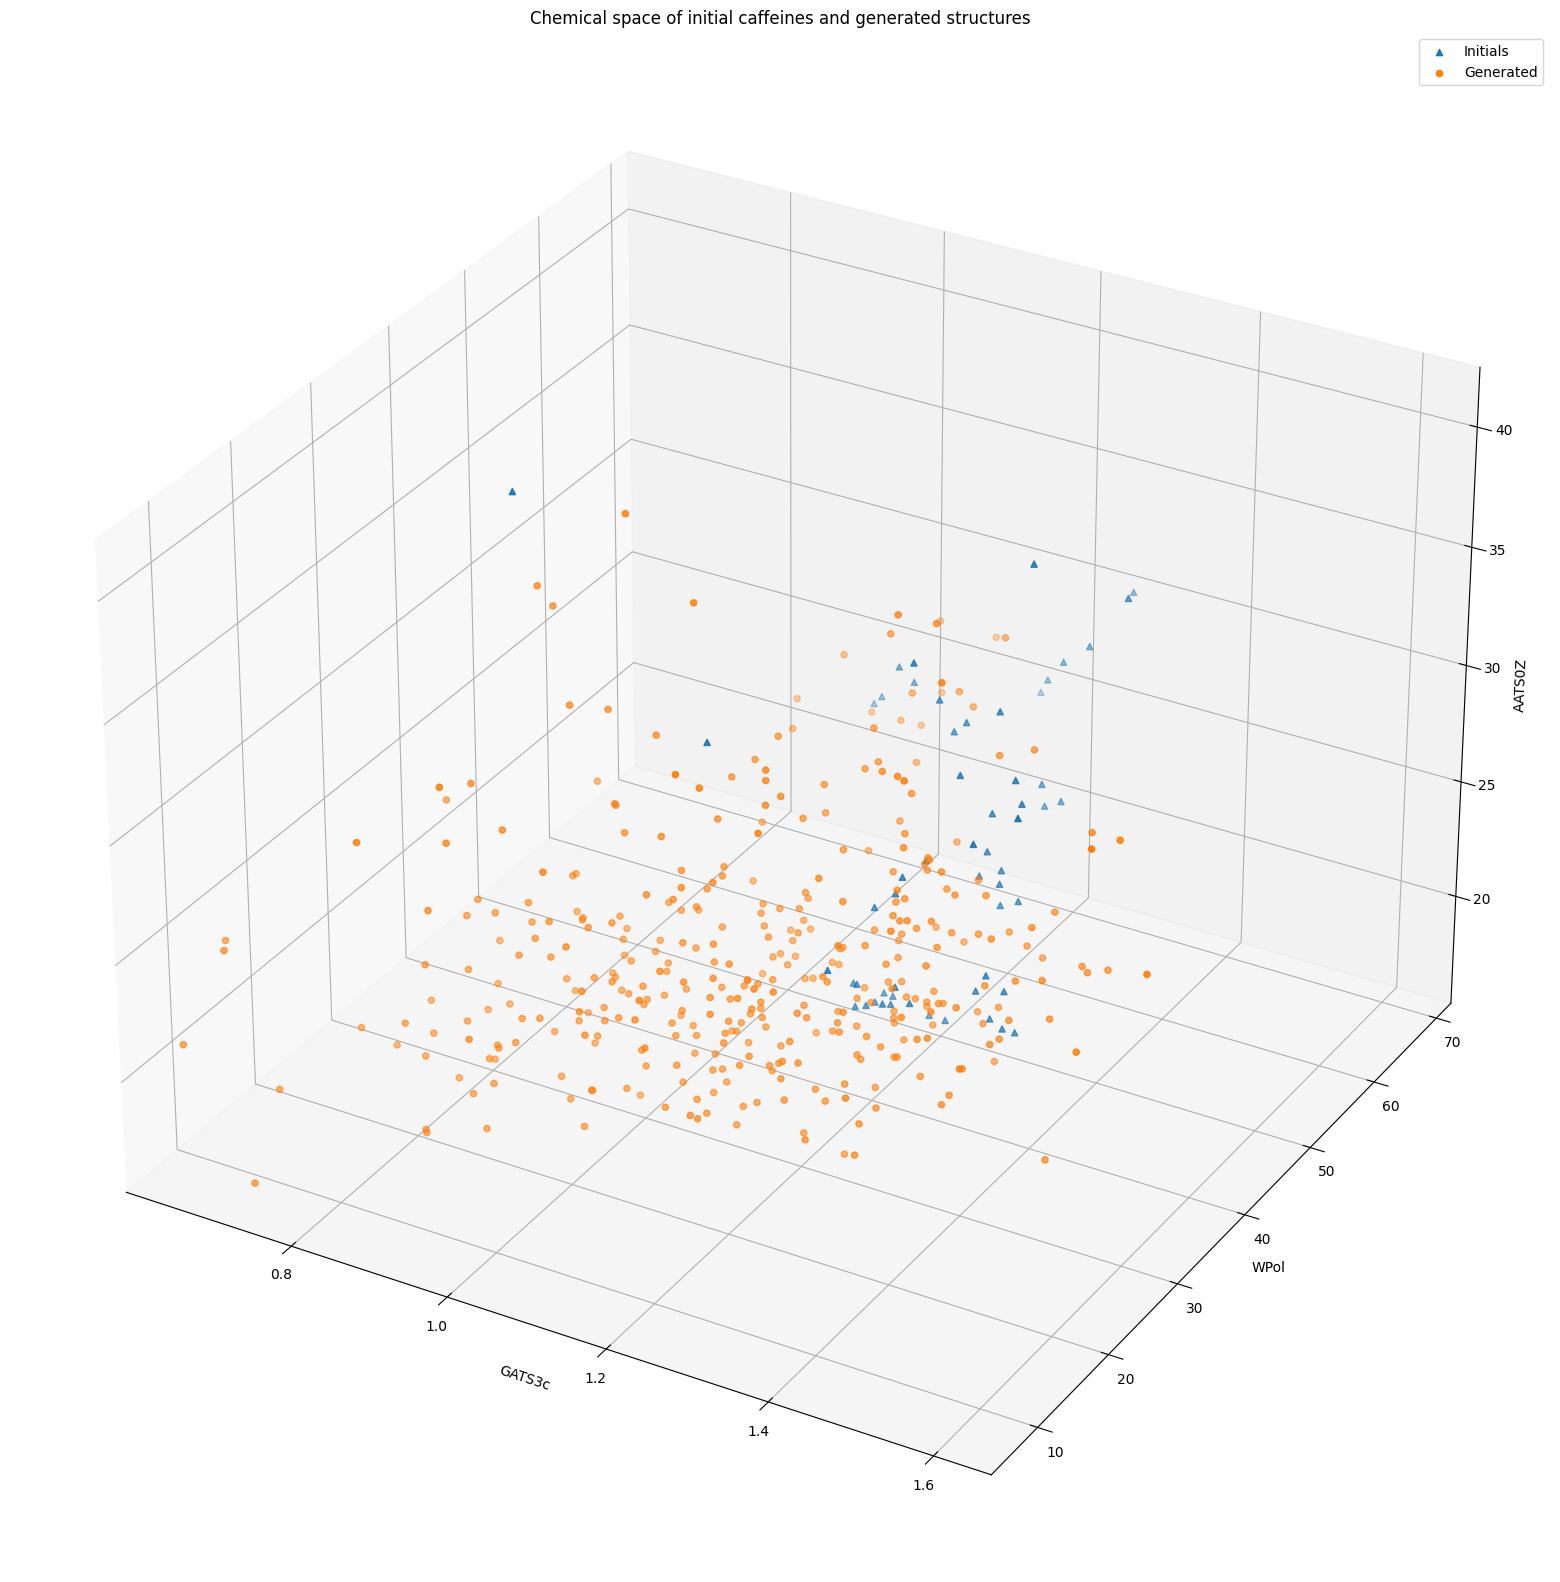

In [33]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(projection='3d')

ax.scatter(molecular_descriptors_initials[descriptor1], molecular_descriptors_initials[descriptor2], molecular_descriptors_initials[descriptor3], marker='^')
ax.scatter(molecular_descriptors_generated[descriptor1], molecular_descriptors_generated[descriptor2], molecular_descriptors_generated[descriptor3], marker='o')
ax.legend(['Initials', 'Generated'])
ax.set_title('Chemical space of initial caffeines and generated structures')
ax.set_xlabel(descriptor1)
ax.set_ylabel(descriptor2)
ax.set_zlabel(descriptor3)
plt.xlim([whole_set_descriptor1.min(), whole_set_descriptor1.max()])
plt.ylim([whole_set_descriptor2.min(), whole_set_descriptor2.max()])
ax.set_zlim([whole_set_descriptor3.min(), whole_set_descriptor3.max()])
plt.show()

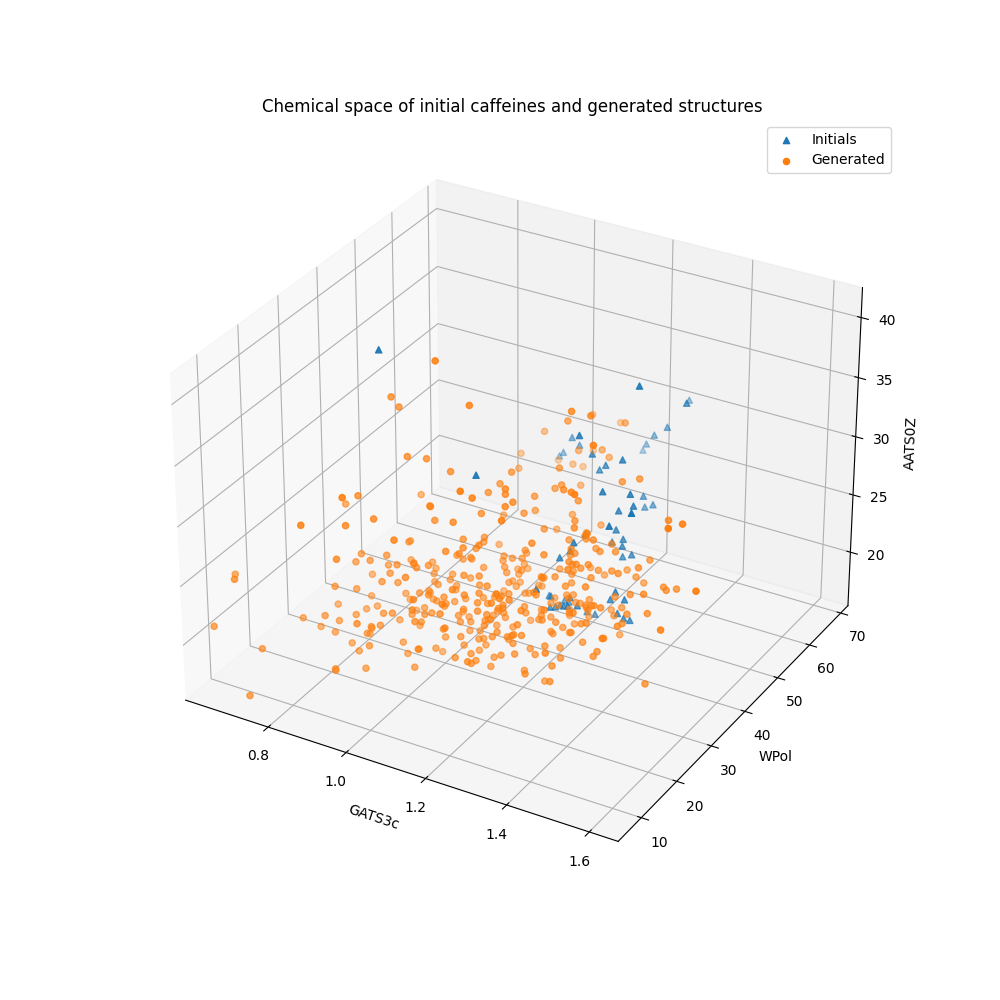

In [34]:
#%matplotlib
%matplotlib widget
#%matplotlib notebook
fig2 = plt.figure(figsize=(10, 10))
ax = fig2.add_subplot(projection='3d')

ax.scatter(molecular_descriptors_initials[descriptor1], molecular_descriptors_initials[descriptor2], molecular_descriptors_initials[descriptor3], marker='^')
ax.scatter(molecular_descriptors_generated[descriptor1], molecular_descriptors_generated[descriptor2], molecular_descriptors_generated[descriptor3], marker='o')
ax.legend(['Initials', 'Generated'])
ax.set_title('Chemical space of initial caffeines and generated structures')
ax.set_xlabel(descriptor1)
ax.set_ylabel(descriptor2)
ax.set_zlabel(descriptor3)
plt.xlim([whole_set_descriptor1.min(), whole_set_descriptor1.max()])
plt.ylim([whole_set_descriptor2.min(), whole_set_descriptor2.max()])
ax.set_zlim([whole_set_descriptor3.min(), whole_set_descriptor3.max()])

#plt.show()
plt.ion()
plt.savefig("Caffeine_chemical_space.svg")
#plt.savefig("Indole_chemical_space.pdf")

In [35]:
## creation of 3D graphs in *svg format for each azimuth
create_pictures_to_movie = 0
if create_pictures_to_movie == 1:
    for ii in range(0,360,1):
        ax.view_init(elev=10., azim=ii)
        plt.savefig("chemical_space/movie%d.svg" % ii)
else:
    pass

## Save used descriptors to excel file

In [36]:
initial_strcutures = pd.DataFrame(data=molecular_descriptors_initials[descriptor1], columns=[descriptor1])

In [37]:
initial_strcutures.head()

,GATS3c
0,1.013511
1,1.266080
2,1.195198
3,1.261500
4,1.263151


In [38]:
initial_strcutures[descriptor2] = molecular_descriptors_initials[descriptor2]
initial_strcutures[descriptor3] = molecular_descriptors_initials[descriptor3]
initial_strcutures['smiles'] = initial

In [39]:
initial_strcutures.head()

,GATS3c,WPol,AATS0Z,smiles
0,1.013511,61,25.120000,CN1C(N(C)CCCCCCCCN(C=C(/C=C(C(OC)=O)\S)[N+]([O...
1,1.266080,34,21.850000,CN(C(N1C)=O)C2=C(N(C)C(NCCCCN)=N2)C1=O
2,1.195198,66,26.575342,O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CCCCCC...
3,1.261500,71,29.723077,O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CC6=C(...
4,1.263151,70,29.723077,O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CC6=CC...


In [40]:
initial_strcutures.to_excel('../Data/Initial_caffeine_mol_desc.xlsx')

In [41]:
generated_strcutures = pd.DataFrame(data=molecular_descriptors_generated[descriptor1], columns=[descriptor1])

In [42]:
generated_strcutures[descriptor2] = molecular_descriptors_generated[descriptor2]
generated_strcutures[descriptor3] = molecular_descriptors_generated[descriptor3]
generated_strcutures['smiles'] = generated_smiles

In [43]:
generated_strcutures.head()

,GATS3c,WPol,AATS0Z,smiles
0,0.941351,10,34.210526,CN1N=C1Sc1ccccc1
1,1.183193,37,19.833333,CN1CCCCCCNCNc2c(n(C)c(=O)n(C)c2=O)N1
2,1.236526,39,19.833333,CNCCC1CCCN(C)Nc2c(c(=O)n(C)c(=O)n2C)N1
3,1.241238,39,22.195122,CN1CCC(CCNC=N)=Nc2c1n(C)c(=O)n(C)c2=O
4,1.144659,28,17.872340,CNCCCCCCN1CC2=C(N1)N(C)C(=O)N(C)C2


In [44]:
generated_strcutures.to_excel('../Data/generated_caffeines.xlsx')

## Choose the generated structures that are the most similar to the initial structure

In [45]:
def takeClosest(descriptor_1, descriptor_1_collection, descriptor_2, descriptor_2_collection, descriptor_3, descriptor_3_collection):
    average_picked = (descriptor_1+descriptor_2+descriptor_3)/3
    val = range(len(generated_strcutures[descriptor1]))
    dfc = pd.DataFrame(data=val, columns=['Number'])
    val_ = []
    for i in range(len(descriptor_1_collection)):
        average_ = (descriptor_1_collection[i]+descriptor_2_collection[i]+descriptor_3_collection[i])/3
        val_.append(average_)
    dfc['Average'] = val_
    
    closest_val = min(dfc['Average'], key=lambda x:abs(x-average_picked))
    
    closest_value_df =  dfc.loc[(dfc['Average'] == closest_val)]
    
    dfc = dfc.loc[dfc['Average'] != closest_val]
    
    closest_val_ = min(dfc['Average'], key=lambda x:abs(x-average_picked))
    
    closest_value_df_ =  dfc.loc[(dfc['Average'] == closest_val_)]
    
    dfc = dfc.loc[dfc['Average'] != closest_val_]
    
    closest_val__ = min(dfc['Average'], key=lambda x:abs(x-average_picked))
    
    closest_value_df__ =  dfc.loc[(dfc['Average'] == closest_val__)]
    
    closest_value_df_combined = pd.concat([closest_value_df, closest_value_df_, closest_value_df__], ignore_index=True)
    
    return closest_value_df_combined

In [46]:
selected_structure_ = int(input("Please write down the integer from 0 to 57 down here: ")) #37
descriptor_1_picked = molecular_descriptors_initials[descriptor1][selected_structure_]
descriptor_2_picked = molecular_descriptors_initials[descriptor2][selected_structure_]
descriptor_3_picked = molecular_descriptors_initials[descriptor3][selected_structure_]

Please write down the integer from 0 to 57 down here: 37


In [47]:
numbers_of_structures = takeClosest(descriptor_1_picked, molecular_descriptors_generated[descriptor1],
                                   descriptor_2_picked, molecular_descriptors_generated[descriptor2],
                                   descriptor_3_picked, molecular_descriptors_generated[descriptor3])

In [48]:
numbers_of_structures

,Number,Average
0,224,26.874603
1,217,27.285223
2,369,27.634277


In [49]:
numbers_of_structures["Number"][0]

224

In [50]:
picked_average = (descriptor_1_picked+descriptor_2_picked+descriptor_3_picked)/3
picked_average

27.044173491839928

In [51]:
descriptor_1_cloeset = molecular_descriptors_generated[descriptor1][numbers_of_structures['Number'][0:]]
descriptor_2_closest = molecular_descriptors_generated[descriptor2][numbers_of_structures['Number'][0:]]
descriptor_3_closed = molecular_descriptors_generated[descriptor3][numbers_of_structures['Number'][0:]]

In [52]:
print('PICKED descriptors:')
print(descriptor_1_picked)
print(descriptor_2_picked)
print(descriptor_3_picked)
print('Closest descriptors:')
print(descriptor_1_cloeset)
print(descriptor_2_closest)
print(descriptor_3_closed)

PICKED descriptors:
1.2863666293659268
55
24.846153846153847
Closest descriptors:
224    1.130850
217    1.149786
369    1.133600
Name: GATS3c, dtype: float64
224    54
217    48
369    53
Name: WPol, dtype: int64
224    25.492958
217    32.705882
369    28.769231
Name: AATS0Z, dtype: float64


In [53]:
picked_structure = initial_strcutures.loc[(initial_strcutures[descriptor1] == descriptor_1_picked) & (initial_strcutures[descriptor2] == descriptor_2_picked) & (initial_strcutures[descriptor3] == descriptor_3_picked)]

In [54]:
picked_structure

,GATS3c,WPol,AATS0Z,smiles
37,1.286367,55,24.846154,O=C1C2=C(N=C(NCCCCN3C(C(C=CC=C4)=C4C3=O)=O)N2C...


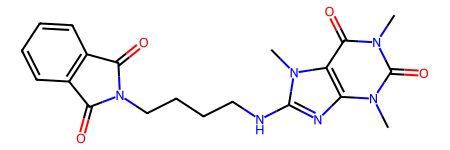

In [55]:
Chem.MolFromSmiles(picked_structure['smiles'][selected_structure_])

In [56]:
descriptor_1_cloeset[numbers_of_structures["Number"][0]]

1.1308502461764376

In [57]:
closest_gen_stru = pd.DataFrame()
for ithem in range(len(descriptor_1_cloeset)):
    df_res = generated_strcutures.loc[(generated_strcutures[descriptor1] == descriptor_1_cloeset[numbers_of_structures["Number"][ithem]]) 
                                            & (generated_strcutures[descriptor2] == descriptor_2_closest[numbers_of_structures["Number"][ithem]]) 
                                            & (generated_strcutures[descriptor3] == descriptor_3_closed[numbers_of_structures["Number"][ithem]])]
    closest_gen_stru=closest_gen_stru.append(df_res)

C:\Users\aleks\AppData\Local\Temp\ipykernel_23840\2947859290.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  closest_gen_stru=closest_gen_stru.append(df_res)
C:\Users\aleks\AppData\Local\Temp\ipykernel_23840\2947859290.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  closest_gen_stru=closest_gen_stru.append(df_res)
C:\Users\aleks\AppData\Local\Temp\ipykernel_23840\2947859290.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  closest_gen_stru=closest_gen_stru.append(df_res)


In [58]:
closest_gen_stru

,GATS3c,WPol,AATS0Z,smiles
224,1.130850,54,25.492958,CNC(=Nc1cc(=O)n(C)c(=O)n1C)N(C)CCCCCCN(C)C=C(C...
217,1.149786,48,32.705882,O=CCN1C(=O)N2CCC(=O)C3C4C=C(CN3C2=S)C1=C4
369,1.133600,53,28.769231,O=CC1N2CCSCCNC13N1C=CC=C2C2=CC3(C1)N=N2


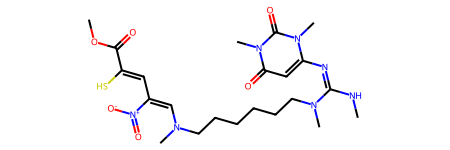

In [59]:
Chem.MolFromSmiles(closest_gen_stru['smiles'][int(numbers_of_structures['Number'][0])])

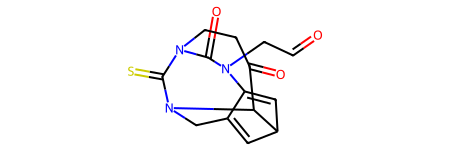

In [60]:
Chem.MolFromSmiles(closest_gen_stru['smiles'][int(numbers_of_structures['Number'][1])])

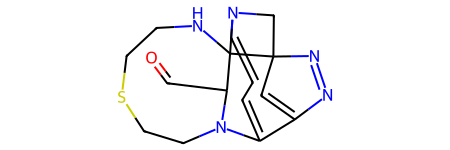

In [61]:
Chem.MolFromSmiles(closest_gen_stru['smiles'][int(numbers_of_structures['Number'][2])])

## Search within a box

In [62]:
center_of_a_box = [descriptor_1_picked, descriptor_2_picked, descriptor_3_picked]

In [63]:
size_of_a_box = [descriptor_1_picked/2, descriptor_2_picked/2, descriptor_3_picked/2]

In [64]:
def create_a_box_to_search_within(center_of_a_box, size_of_a_box):
    chemical_space_descriptor_1 = [center_of_a_box[0]-size_of_a_box[0], center_of_a_box[0]+size_of_a_box[0]]
    chemical_space_descriptor_2 = [center_of_a_box[1]-size_of_a_box[1], center_of_a_box[1]+size_of_a_box[1]]
    chemical_space_descriptor_3 = [center_of_a_box[2]-size_of_a_box[2], center_of_a_box[2]+size_of_a_box[2]]
    return chemical_space_descriptor_1, chemical_space_descriptor_2, chemical_space_descriptor_3

In [65]:
chemical_space_descriptor_1, chemical_space_descriptor_2, chemical_space_descriptor_3 = create_a_box_to_search_within(center_of_a_box, size_of_a_box) 

In [66]:
chemical_space_descriptor_1

[0.6431833146829634, 1.9295499440488904]

In [67]:
chemical_space_descriptor_2

[27.5, 82.5]

In [68]:
chemical_space_descriptor_3

[12.423076923076923, 37.269230769230774]

In [69]:
selected_structures = generated_strcutures.loc[(generated_strcutures[descriptor1] >= chemical_space_descriptor_1[0]) 
                                               & (generated_strcutures[descriptor1] <= chemical_space_descriptor_1[1]) 
                                               & (generated_strcutures[descriptor2] >= chemical_space_descriptor_2[0]) 
                                               & (generated_strcutures[descriptor2] <= chemical_space_descriptor_2[1]) 
                                               & (generated_strcutures[descriptor3] >= chemical_space_descriptor_3[0]) 
                                               & (generated_strcutures[descriptor3] >= chemical_space_descriptor_3[1])]

In [70]:
selected_structures

,GATS3c,WPol,AATS0Z,smiles
207,1.076425,29,38.102564,Cc1ccccc1SCC(=S)N1C=CCNCSCN=N1


In [71]:
print("Picked initial structure: "+ str(descriptor1) + ' ' + str(descriptor_1_picked), str(descriptor2) + ' ' + str(descriptor_2_picked), str(descriptor3) + ' ' + str(descriptor_3_picked))

Picked initial structure: GATS3c 1.2863666293659268 WPol 55 AATS0Z 24.846153846153847


In [72]:
mols = [Chem.MolFromSmiles(smi) for smi in selected_structures['smiles']]

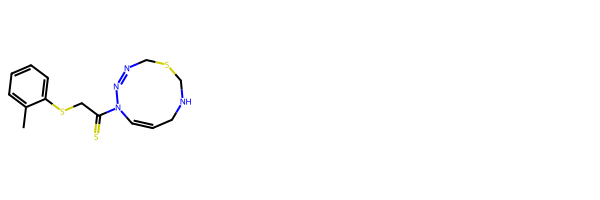

In [73]:
Chem.Draw.MolsToGridImage(mols)